# Rainfall Weather Forecasting

Project Description


Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
    
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


# Load libraries and dataset

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Importing dataset
df_rain = pd.read_csv(r"C:\Users\Premium\Downloads\weatherAUS.csv")

In [4]:
df_rain.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [5]:
df_rain.shape


(8425, 23)

There are 8425 Rows and 23 Coloumns

In [6]:
df_rain.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Statistical Analysis

In [7]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

We can clearly see that there are many missing values.

The Date column needs converted to a datetime datatype



In [11]:
df_rain.isin([' ','NA','-']).sum().any()

False

# checking for null values

In [9]:
# Check null values
df_rain.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [12]:
round(df_rain.isna().sum() / len(df_rain), 3)

Date             0.000
Location         0.000
MinTemp          0.009
MaxTemp          0.007
Rainfall         0.028
Evaporation      0.417
Sunshine         0.474
WindGustDir      0.118
WindGustSpeed    0.118
WindDir9am       0.098
WindDir3pm       0.037
WindSpeed9am     0.009
WindSpeed3pm     0.013
Humidity9am      0.007
Humidity3pm      0.012
Pressure9am      0.155
Pressure3pm      0.156
Cloud9am         0.287
Cloud3pm         0.291
Temp9am          0.007
Temp3pm          0.011
RainToday        0.028
RainTomorrow     0.028
dtype: float64

Evaporation, Sunshine, Cloud9am, and Cloud3pm are all missing more than 35% of their values

These missing values can be handled by either dropping certain columns/rows, imputing the values, or a mix of both.

In [14]:
df_rain.describe()  #look at some summary statistics

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


Multiple columns have clear outliers (e.g., the max Rainfall value is 371.0 despite the 75th percentile being 1.0)

# Exploratorary Data Analysis

In [17]:
df_rain.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Univariate Analysis

Exploring the target variable "Raintoday"

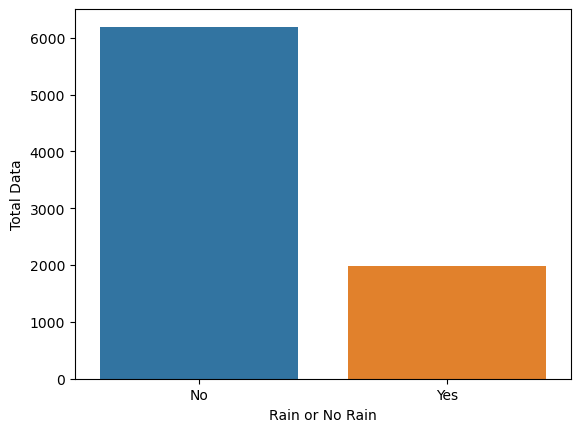

In [19]:
sns.countplot(x='RainToday', data=df_rain)
plt.xlabel('Rain or No Rain')
plt.ylabel('Total Data')
plt.show()

In order to get a better feel for the data and catch any placeholder values that may not have shown up in the summary statistics, I also want to check the top five most frequent values for each column.

In [20]:
for col in df_rain.columns:
    print('\n')
    print(col)
    print('-'*15)
    print(df_rain[col].value_counts(normalize=True).head())



Date
---------------
2011-01-31    0.000593
2011-05-08    0.000593
2011-05-21    0.000593
2011-05-20    0.000593
2011-05-19    0.000593
Name: Date, dtype: float64


Location
---------------
Melbourne       0.192522
Williamtown     0.145994
PerthAirport    0.142908
Albury          0.107656
Newcastle       0.097567
Name: Location, dtype: float64


MinTemp
---------------
12.0    0.008862
13.2    0.008503
13.8    0.008263
12.7    0.008144
16.4    0.008024
Name: MinTemp, dtype: float64


MaxTemp
---------------
19.0    0.010400
23.8    0.008966
19.8    0.008846
25.0    0.008488
22.0    0.008129
Name: MaxTemp, dtype: float64


Rainfall
---------------
0.0    0.647404
0.2    0.049603
0.4    0.021625
0.6    0.014172
1.2    0.010507
Name: Rainfall, dtype: float64


Evaporation
---------------
4.0    0.036637
3.0    0.033177
2.4    0.029921
2.2    0.029717
2.6    0.029106
Name: Evaporation, dtype: float64


Sunshine
---------------
0.0     0.037463
11.1    0.015346
11.2    0.015121
11.0    0.

There's a disconnect between the Rainfall value counts and the RainToday / RainTomorrow value counts. While roughly 64% of observations had a value of 0 for Rainfall, about 77.5% of days did not have rainfall according to the latter two columns. This discrepency is likely due to differences in the number of missing values for each column
The RainToday and RainTomorrow columns should be converted to 0s and 1s for easier manipulation

In [21]:
df_rain.RainToday = df_rain.RainToday.map({'No': 0, 'Yes': 1})
df_rain.RainToday.value_counts(normalize=True)

0.0    0.756872
1.0    0.243128
Name: RainToday, dtype: float64

In [23]:
df_rain.RainTomorrow = df_rain.RainTomorrow.map({'No': 0, 'Yes': 1})
df_rain.RainTomorrow.value_counts(normalize=True)

0.0    0.75678
1.0    0.24322
Name: RainTomorrow, dtype: float64

In [24]:
df_rain.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
5860,2011-03-18,Melbourne,14.2,19.5,0.0,3.4,3.5,SE,35.0,SE,...,58.0,49.0,1019.4,1017.7,7.0,7.0,14.9,19.0,0.0,0.0
4297,2008-12-09,Wollongong,17.1,23.4,3.0,NaN,NaN,NE,57.0,ENE,...,74.0,78.0,1010.2,1005.8,NaN,4.0,21.4,22.9,1.0,0.0
6755,2014-07-05,Adelaide,11.0,13.8,3.2,NaN,NaN,WSW,41.0,WSW,...,62.0,71.0,1022.6,1021.2,NaN,NaN,12.8,13.4,1.0,1.0
6592,2012-05-07,Brisbane,11.2,25.4,0.0,3.6,10.3,SW,15.0,SW,...,64.0,42.0,1018.6,1014.5,2.0,1.0,17.4,24.9,0.0,0.0
3770,2016-01-24,Williamtown,20.0,25.8,0.0,NaN,NaN,S,30.0,SSE,...,68.0,65.0,1013.3,1011.9,8.0,8.0,23.4,24.8,0.0,0.0


In [25]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [26]:
numerical_feature = [feature for feature in df_rain.columns if df_rain[feature].dtypes != 'O']
print("Numerical Features Count {}".format(len(numerical_feature)))

Numerical Features Count 18


In [27]:
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [28]:
discrete_feature=[feature for feature in numerical_feature if len(df_rain[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))

Discrete feature Count 4
Continuous feature Count 14


In [29]:
# filling the null value 

df_rain['MinTemp']=df_rain['MinTemp'].fillna(df_rain['MinTemp'].mean())
df_rain['MaxTemp']=df_rain['MinTemp'].fillna(df_rain['MaxTemp'].mean())
df_rain['Rainfall']=df_rain['Rainfall'].fillna(df_rain['Rainfall'].mean())
df_rain['Evaporation']=df_rain['Evaporation'].fillna(df_rain['Evaporation'].mean())
df_rain['Sunshine']=df_rain['Sunshine'].fillna(df_rain['Sunshine'].mean())
df_rain['WindGustSpeed']=df_rain['WindGustSpeed'].fillna(df_rain['WindGustSpeed'].mean())
df_rain['WindSpeed9am']=df_rain['WindSpeed9am'].fillna(df_rain['WindSpeed9am'].mean())
df_rain['WindSpeed3pm']=df_rain['WindSpeed3pm'].fillna(df_rain['WindSpeed3pm'].mean())
df_rain['Humidity9am']=df_rain['Humidity9am'].fillna(df_rain['Humidity9am'].mean())
df_rain['Humidity3pm']=df_rain['Humidity3pm'].fillna(df_rain['Humidity3pm'].mean())
df_rain['Pressure9am']=df_rain['Pressure9am'].fillna(df_rain['Pressure9am'].mean())
df_rain['Pressure3pm']=df_rain['Pressure3pm'].fillna(df_rain['Pressure3pm'].mean())
df_rain['Cloud9am']=df_rain['Cloud9am'].fillna(df_rain['Cloud9am'].mean())
df_rain['Cloud3pm']=df_rain['Cloud3pm'].fillna(df_rain['Cloud3pm'].mean())
df_rain['Temp9am']=df_rain['Temp9am'].fillna(df_rain['Temp9am'].mean())
df_rain['Temp3pm']=df_rain['Temp3pm'].fillna(df_rain['Temp3pm'].mean())

In [30]:
#Filling the missing values for continuous variables with mode
df_rain['RainToday']=df_rain['RainToday'].fillna(df_rain['RainToday'].mode()[0])
df_rain['RainTomorrow']=df_rain['RainTomorrow'].fillna(df_rain['RainTomorrow'].mode()[0])
df_rain['WindDir9am'] = df_rain['WindDir9am'].fillna(df_rain['WindDir9am'].mode()[0])
df_rain['WindGustDir'] =df_rain['WindGustDir'].fillna(df_rain['WindGustDir'].mode()[0])
df_rain['WindDir3pm'] = df_rain['WindDir3pm'].fillna(df_rain['WindDir3pm'].mode()[0])

In [31]:
df_rain.groupby('Location')['MaxTemp'].max()

Location
Adelaide        25.6
Albury          28.3
Brisbane        25.0
CoffsHarbour    24.2
Darwin          27.5
Melbourne       25.5
Newcastle       22.9
Penrith         22.3
PerthAirport    28.5
Uluru           14.9
Williamtown     26.1
Wollongong      22.8
Name: MaxTemp, dtype: float64

In [32]:
# Group your dataframe by location and find out the averages of all numeric values.

df_rain.groupby('Location').mean()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,,,,,,,,,,,,,,,,,,
Adelaide,10.980000,10.980000,1.435237,5.121671,7.632205,37.990244,11.317073,16.404878,59.029268,44.809756,1020.091220,1018.074634,4.566622,4.503183,15.861951,20.189756,0.214634,0.219512
Albury,10.062587,10.062587,2.129055,5.389395,7.632205,33.933951,8.248669,14.297245,72.604190,47.062845,1017.581477,1014.981477,5.285971,4.837624,14.555347,21.673539,0.219405,0.219405
Brisbane,15.369073,15.369073,3.109896,4.875629,7.918155,26.456341,6.031088,9.685781,66.474650,54.182210,1018.123661,1015.031731,3.694301,3.898969,20.685427,23.976141,0.233161,0.233161
CoffsHarbour,13.704244,13.704244,5.434707,3.700885,7.332570,38.872438,15.389027,20.512385,66.314239,60.648527,1018.587693,1016.097781,3.816694,4.116213,19.611620,21.745733,0.306056,0.304419
Darwin,21.324800,21.324800,2.735200,6.349558,9.389200,39.288000,16.012000,20.204000,63.828000,43.932000,1013.373200,1009.524800,3.800000,3.580000,25.601200,30.668000,0.132000,0.128000
Melbourne,12.443280,12.443280,2.313878,4.529963,6.419399,45.779558,19.709001,22.697904,66.754405,51.245992,1017.845623,1016.075260,5.155148,5.127789,15.332999,19.952457,0.249075,0.250308
Newcastle,12.937727,12.937727,3.029054,5.389395,7.632205,40.174469,5.694822,12.746831,73.754842,55.915732,1017.640233,1015.236075,4.064556,4.348869,17.433322,22.324634,0.240876,0.240876
Penrith,11.279668,11.279668,2.361448,5.389395,7.632205,31.413225,5.626556,11.024896,72.863071,45.481328,1017.640233,1015.236075,4.566622,4.503183,15.533195,22.135270,0.240664,0.240664
PerthAirport,13.172674,13.172674,1.916279,5.784460,8.797117,44.797063,18.043189,21.353821,58.833887,42.131229,1017.082508,1014.548173,3.449336,3.559801,19.330648,24.472176,0.200997,0.200997


# BiVariate Analysis

Histogram For the catergorical features

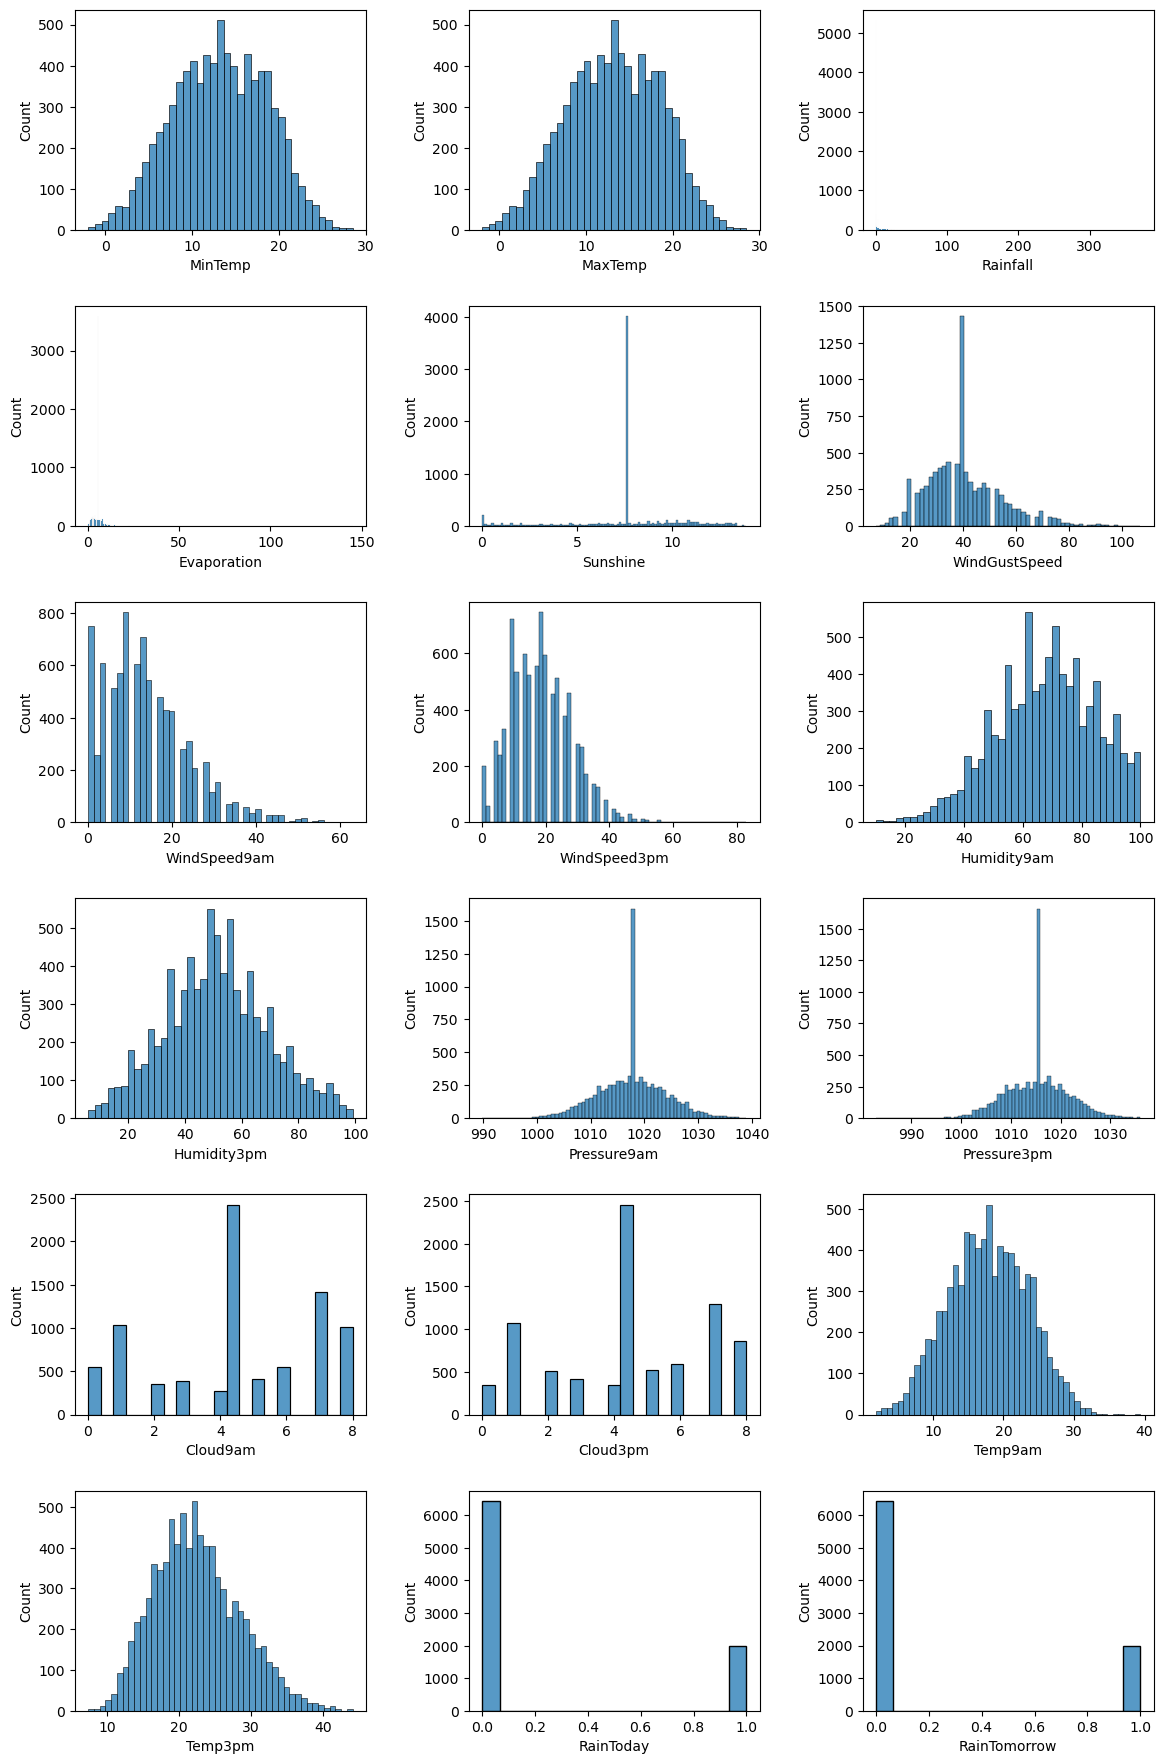

In [35]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 18))
axes = axes.reshape(-1)

continuous = [col for col in df_rain.columns if df_rain[col].dtype != object]
for i, col in enumerate(continuous):
    sns.histplot(df_rain[col], ax=axes[i])

fig.tight_layout(pad=2.0)



Observations:

Most features are normally distributed as expected.

The Rainfall distribution needs further investigation as the large outlier is likely affecting the ability to plot the data.

The Sunshine distribution is interesting but largely explainable.

The high frequency of 0 values represents days where it is overcast all day.

The abrupt decline in frequency after around 11 hours is a reflection of the limited number of days of the year where it is light out for that many hours or longer.

The Humidity9am distribution is particularly interesting due to the large spike in frequencies near 100%.

In [37]:
#Visualizing the distribution of rainfaall

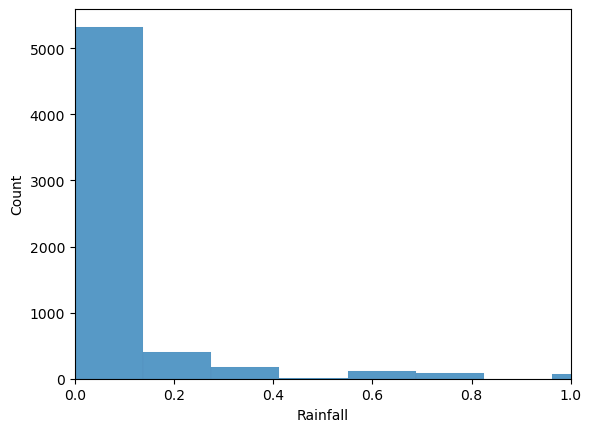

In [36]:
sns.histplot(df_rain.Rainfall)
plt.xlim(0, 1);

# Rainy Days by Location

In [38]:
df_rain_by_loc = df_rain.groupby(by='Location').sum()
df_rain_by_loc = df_rain_by_loc[['RainToday']]
df_rain_by_loc.head()

,RainToday
Location,
Adelaide,44.0
Albury,199.0
Brisbane,135.0
CoffsHarbour,187.0
Darwin,33.0


# Correlation Matrix

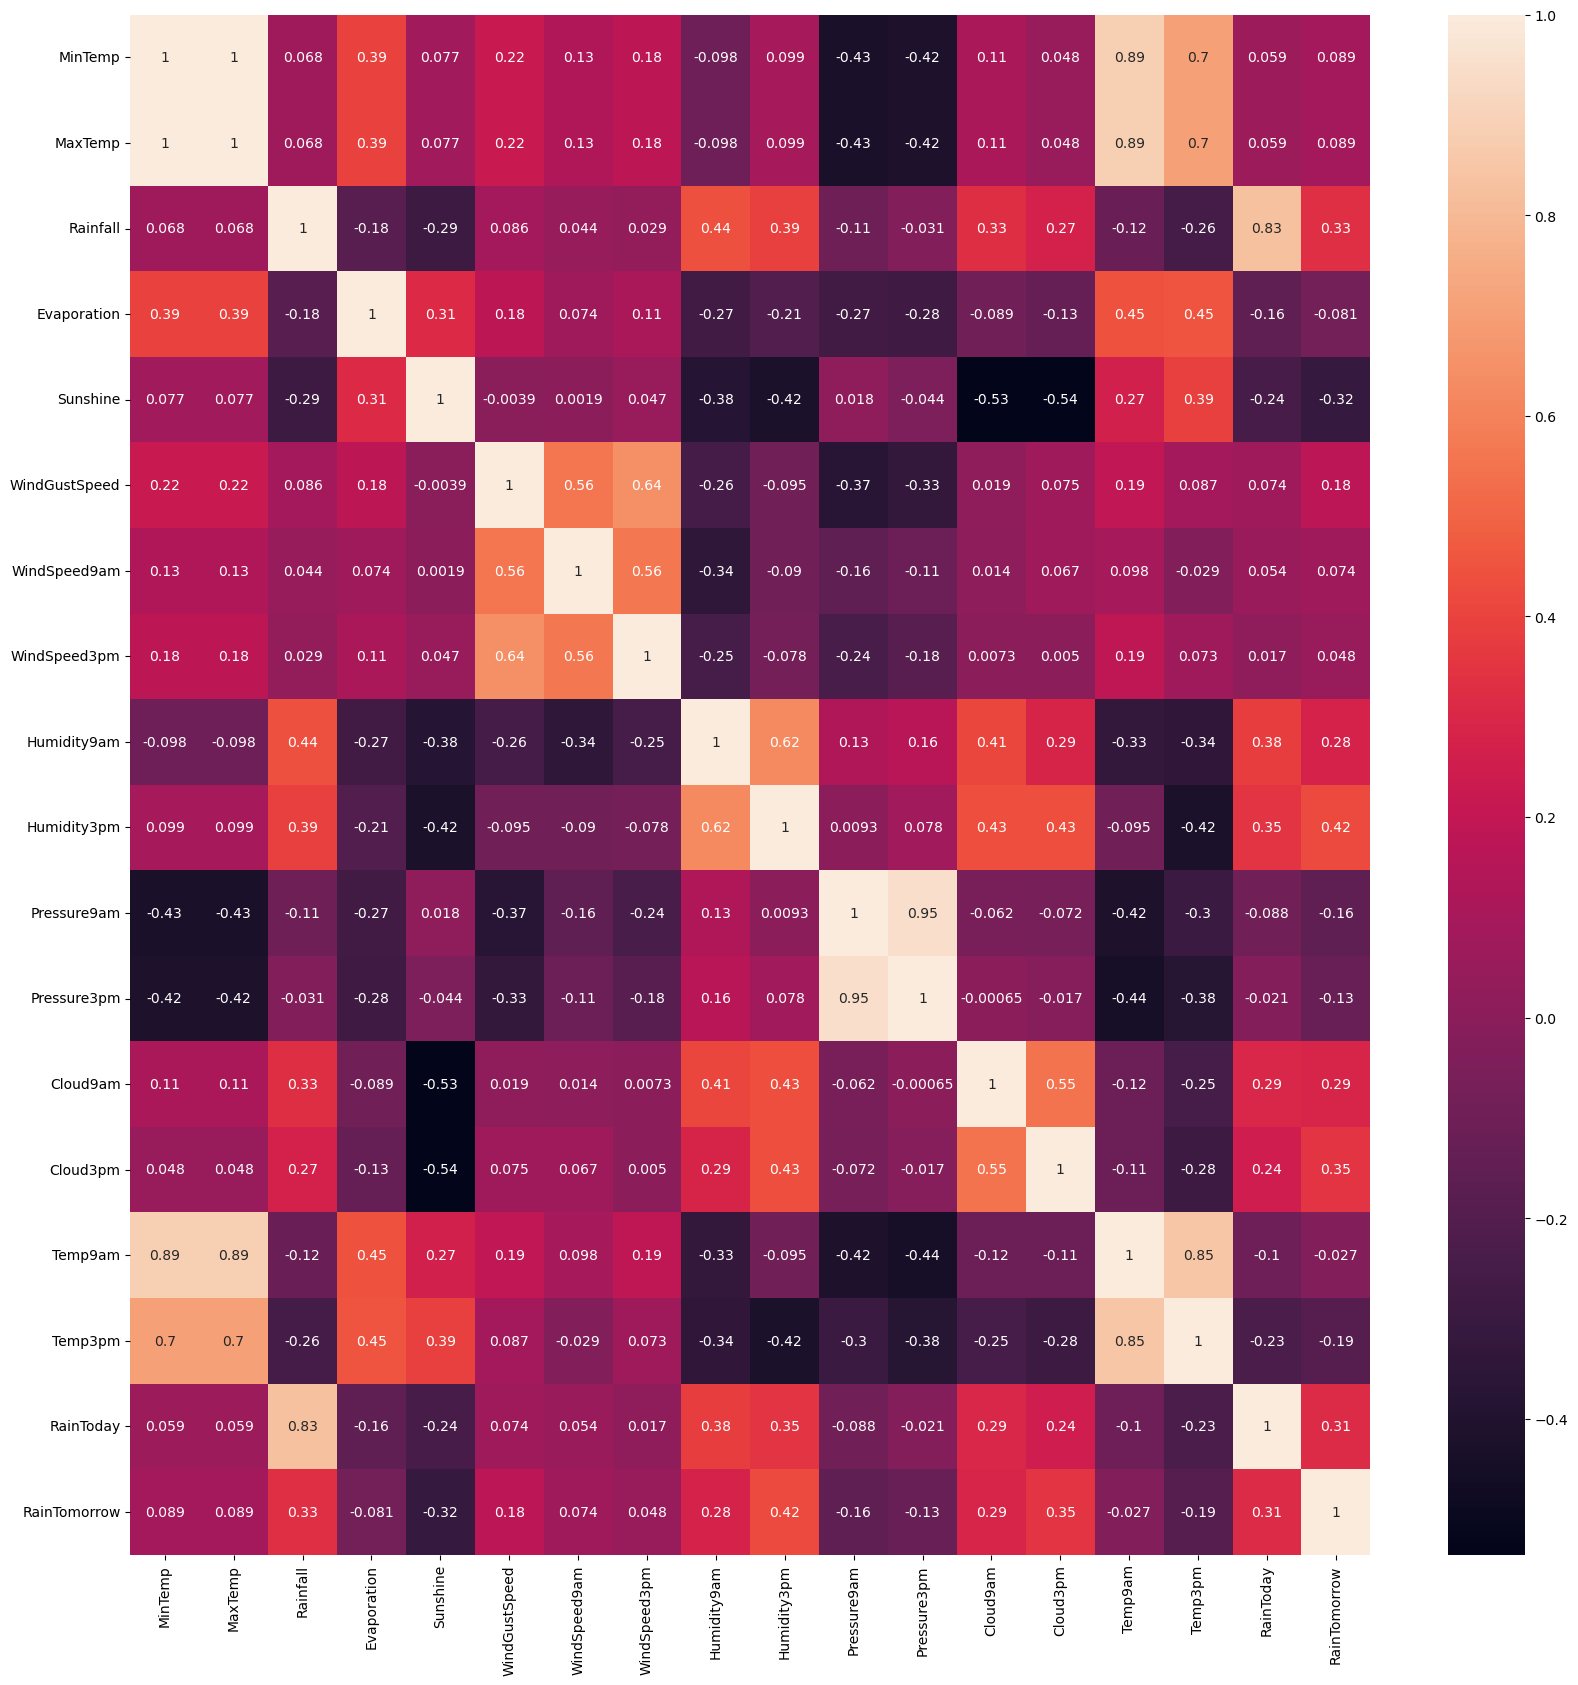

In [39]:
corrmat = df_rain.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [40]:
# parse the dates, currently coded as strings, into datetime format

df_rain['Date'] = pd.to_datetime(df_rain['Date'])

df_rain['Year'] = df_rain['Date'].dt.year

df_rain['Month'] = df_rain['Date'].dt.month

df_rain['Day'] = df_rain['Date'].dt.day

df_rain.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01,Albury,13.4,13.4,0.6,5.389395,7.632205,W,44.0,W,...,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0,2008,12,1
1,2008-12-02,Albury,7.4,7.4,0.0,5.389395,7.632205,WNW,44.0,NNW,...,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0,2008,12,2
2,2008-12-03,Albury,12.9,12.9,0.0,5.389395,7.632205,WSW,46.0,W,...,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0,2008,12,3
3,2008-12-04,Albury,9.2,9.2,0.0,5.389395,7.632205,NE,24.0,SE,...,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0,2008,12,4
4,2008-12-05,Albury,17.5,17.5,1.0,5.389395,7.632205,W,41.0,ENE,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,2008,12,5


We can see that there are three additional columns created from Date variable. Now, I will drop the original Date variable from the dataset.

In [41]:
# drop the original Date variable

df_rain.drop('Date', axis=1, inplace = True)

In [42]:
df_rain.head(4)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,13.4,0.6,5.389395,7.632205,W,44.0,W,WNW,...,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0,2008,12,1
1,Albury,7.4,7.4,0.0,5.389395,7.632205,WNW,44.0,NNW,WSW,...,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0,2008,12,2
2,Albury,12.9,12.9,0.0,5.389395,7.632205,WSW,46.0,W,WSW,...,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0,2008,12,3
3,Albury,9.2,9.2,0.0,5.389395,7.632205,NE,24.0,SE,E,...,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0,2008,12,4


Now, we can see that the Date variable has been removed from the dataset.

In [43]:
# doing labelencder train dataset transfer into 0,1,2...

from sklearn.preprocessing import LabelEncoder

cols = ['Location',"WindDir9am","WindDir3pm","WindGustDir"]
le = LabelEncoder()
for col in cols:
    df_rain[col] = le.fit_transform(df_rain[col])

In [44]:
df_rain.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,1,13.4,13.4,0.6,5.389395,7.632205,13,44.0,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0.0,0.0,2008,12,1
1,1,7.4,7.4,0.0,5.389395,7.632205,14,44.0,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0.0,0.0,2008,12,2
2,1,12.9,12.9,0.0,5.389395,7.632205,15,46.0,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0.0,0.0,2008,12,3
3,1,9.2,9.2,0.0,5.389395,7.632205,4,24.0,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0.0,0.0,2008,12,4
4,1,17.5,17.5,1.0,5.389395,7.632205,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.0,2008,12,5


In [45]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   int32  
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   int32  
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   int32  
 9   WindDir3pm     8425 non-null   int32  
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       8425 non-null   float64
 17  Cloud3pm       8425 non-null   float64
 18  Temp9am 

# Machine Learning Model Building and Prediction

In [46]:
X = df_rain.drop(["RainTomorrow"], axis=1)
Y = df_rain["RainTomorrow"]

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
# Spliting data into training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,Y, test_size =0.2, random_state = 0)

In [49]:
print('Train size:', X_train.shape[0])
print('Test size: ', X_test.shape[0])

Train size: 6740
Test size:  1685


In [55]:
# model training 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report

# Logistic Regression

In [56]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

Confusion Matrix
-----------------------------------------------------


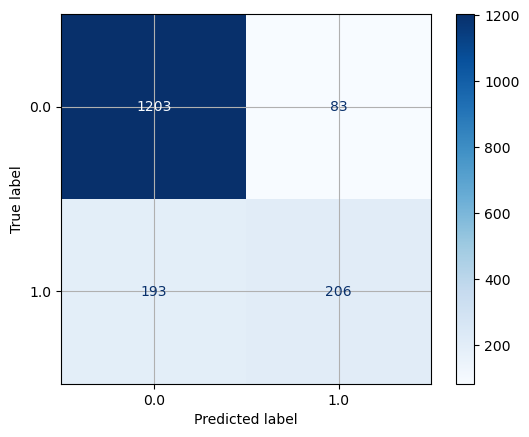



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      1286
         1.0       0.71      0.52      0.60       399

    accuracy                           0.84      1685
   macro avg       0.79      0.73      0.75      1685
weighted avg       0.83      0.84      0.83      1685



ROC Curve
-----------------------------------------------------


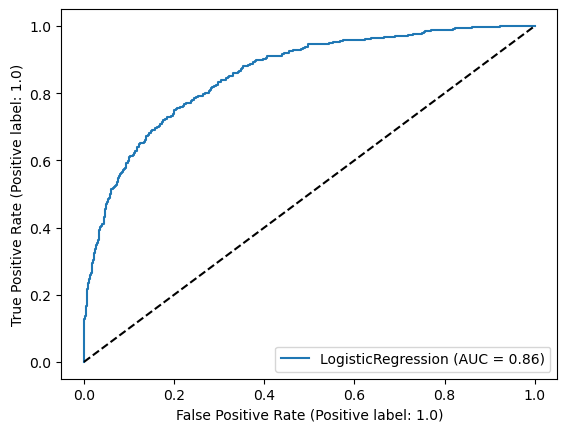



Checking model fitness
-----------------------------------------------------
Train score: 0.8323
Test score:  0.8362




In [57]:
def conf_matrix(model, X_test, y_test, cmap='Blues'):
    plot_confusion_matrix(model, X_test, y_test, cmap=cmap)
    plt.grid()
    plt.show()

def roc_curve_custom(model, X_test, y_test):
    plot_roc_curve(model, X_test, y_test)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.show()
    
def evaluate(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, y_pred=y_pred):
    # Confusion Matrix
    print('Confusion Matrix')
    print('-'*53)
    conf_matrix(model, X_test, y_test)
    print('\n') 
    
    # Classification Report
    print('Classification Report') 
    print('-'*53)
    print(classification_report(y_test, y_pred))
    print('\n')
    
    # ROC Curve
    print('ROC Curve')
    print('-'*53)
    roc_curve_custom(model, X_test, y_test)
    print('\n')
    
    # Checking model fitness
    print('Checking model fitness') 
    print('-'*53)
    print('Train score:', round(model.score(X_train, y_train), 4))
    print('Test score: ', round(model.score(X_test, y_test), 4))
    print('\n')
    
evaluate(logreg)

Decent performance for a baseline model

# Applying other classification algorithm

In [59]:
models = {
    "KNN": KNeighborsClassifier(),
    "SVM" :SVC(),
    "Naive Bayes": GaussianNB(),
    "Decisiontree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(max_features='sqrt', random_state=5)
}

for model in models.items():
    m = model[1]
    m.fit(X_train, y_train)
    print(model[0])
    print("Score: ", m.score(X_test,y_test))
    print("")

KNN
Score:  0.8373887240356083

SVM
Score:  0.8611275964391691

Naive Bayes
Score:  0.7976261127596439

Decisiontree
Score:  0.8498516320474777

RandomForest
Score:  0.8997032640949555



Here we can see that random forest also gives a verygood score so we vcan check other metrics for this alone.

# Random Forest


In [60]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0., 0., 0., ..., 1., 0., 0.])

Confusion Matrix
-----------------------------------------------------


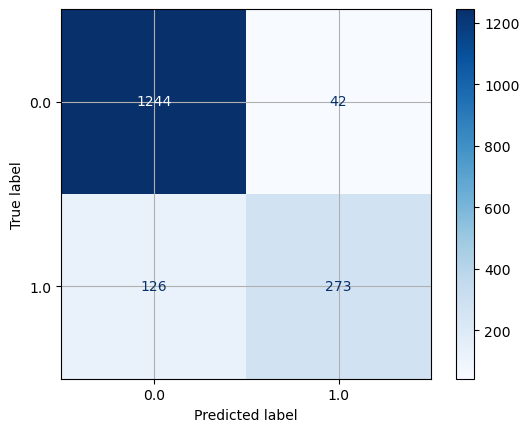



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      1286
         1.0       0.87      0.68      0.76       399

    accuracy                           0.90      1685
   macro avg       0.89      0.83      0.85      1685
weighted avg       0.90      0.90      0.90      1685



ROC Curve
-----------------------------------------------------


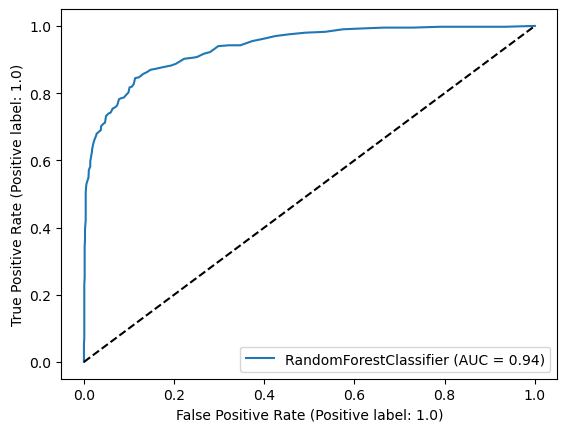



Checking model fitness
-----------------------------------------------------
Train score: 1.0
Test score:  0.9003




In [61]:
evaluate(rf, y_pred=y_pred_rf)

Good scores on the evaluation metrics
The model is a bit overfit

# XGBoost

In [63]:
from xgboost import XGBClassifier

In [64]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

array([0, 0, 0, ..., 0, 0, 0])

Confusion Matrix
-----------------------------------------------------


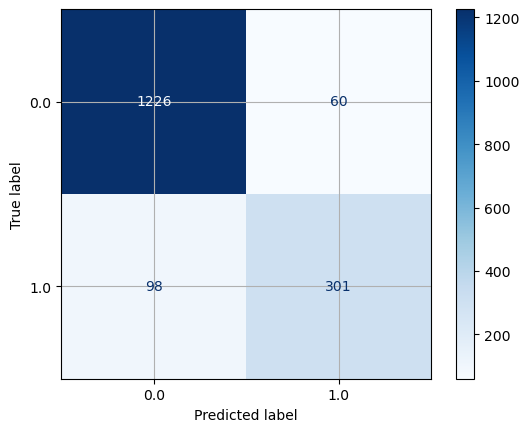



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94      1286
         1.0       0.83      0.75      0.79       399

    accuracy                           0.91      1685
   macro avg       0.88      0.85      0.87      1685
weighted avg       0.90      0.91      0.90      1685



ROC Curve
-----------------------------------------------------


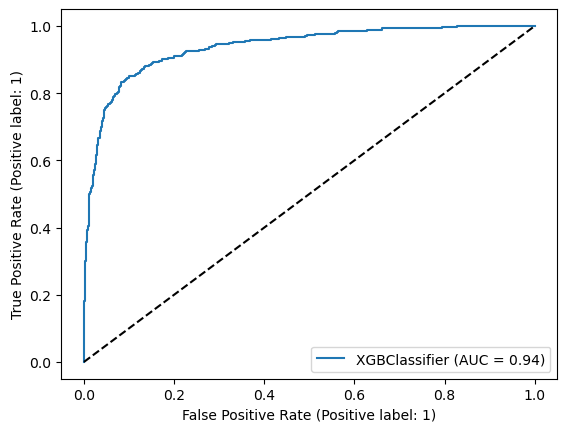



Checking model fitness
-----------------------------------------------------
Train score: 0.9953
Test score:  0.9062




In [65]:
evaluate(xgb, y_pred=y_pred_xgb)

Observations:

Highest accuracy score yet

Highest AUC yet .The model is decently fit

# Hyperparameter tuning

Since XGBoost is most accurate predicted model we perform hyperparameter tuning on this.

In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [68]:
xgb_params = {
    'n_estimators': [10, 35, 100],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.25]
}

xgb_gs = GridSearchCV(xgb, xgb_params, scoring='accuracy', cv=3)
xgb_gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
           

In [69]:
xgb_gs.best_params_

{'learning_rate': 0.25, 'max_depth': 15, 'n_estimators': 100}

In [70]:
round(xgb_gs.best_score_, 4)

0.873

In [71]:
y_pred_xgb_gs = xgb_gs.predict(X_test)
y_pred_xgb_gs

array([0, 0, 0, ..., 0, 0, 0])

Confusion Matrix
-----------------------------------------------------


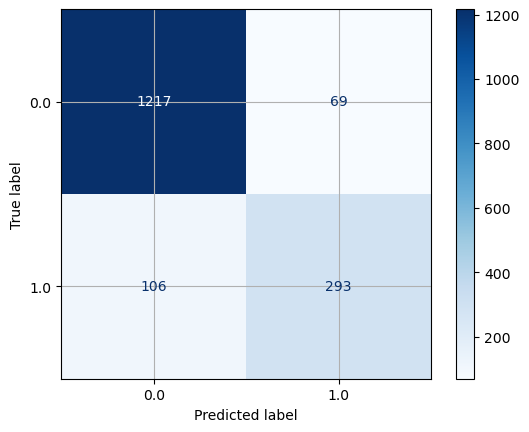



Classification Report
-----------------------------------------------------
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93      1286
         1.0       0.81      0.73      0.77       399

    accuracy                           0.90      1685
   macro avg       0.86      0.84      0.85      1685
weighted avg       0.89      0.90      0.89      1685



ROC Curve
-----------------------------------------------------


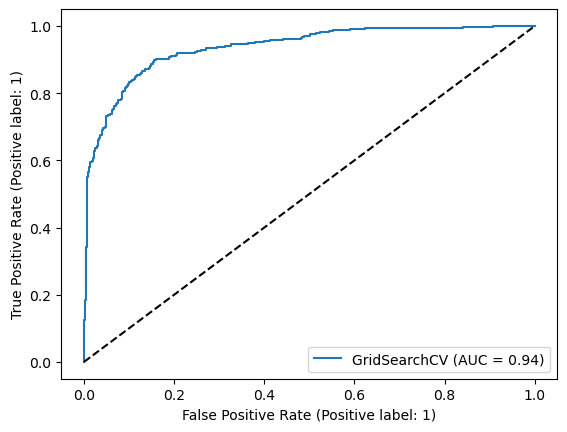



Checking model fitness
-----------------------------------------------------
Train score: 1.0
Test score:  0.8961




In [72]:
evaluate(xgb_gs, y_pred=y_pred_xgb_gs)

this model achieved the best results,

The best performing model is the hyperparameter-tuned XGBoost model with an accuracy of approximately 86%. The scores for both the training and testing data were similar, reducing concerns of the model being overfit.

# Save model

In [74]:
import joblib

In [76]:
joblib.dump(xgb_gs, 'rainPred.pkl')

['rainPred.pkl']